# Exploración de los datos de criptomonedas

## Índice
1. [Descripción de los datos ](#id1)
2. [Outliers](#id2)
3. [Distribución y relación de los datos](#id3)


## 1. Descripción de los datos

In [3]:
# se importa las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('../datasets/monedas_markets.csv', delimiter=',')

In [5]:
df.head()

,Unnamed: 0,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage
0,0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26034.000000,506846513289,1,5.467374e+11,5.550822e+09,...,-62.29260,2021-11-10T14:24:11.849Z,67.810000,38294.59123,2013-07-06T00:00:00.000Z,NaN,2023-08-25T23:23:50.664Z,NaN,NaN,NaN
1,1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1653.190000,198787942142,2,1.987879e+11,7.126441e+09,...,-66.10372,2021-11-10T14:24:19.604Z,0.432979,381800.58017,2015-10-20T00:00:00.000Z,NaN,2023-08-25T23:23:50.478Z,83.901467,btc,8390.146666
2,2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999580,82814303245,3,8.281430e+10,1.520142e+10,...,-24.45143,2018-07-24T00:00:00.000Z,0.572521,74.59265,2015-03-02T00:00:00.000Z,NaN,2023-08-25T23:20:00.476Z,NaN,NaN,NaN
3,3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,217.980000,33537048608,4,4.359533e+10,3.806351e+08,...,-68.23917,2021-05-10T07:24:17.097Z,0.039818,547336.61315,2017-10-19T00:00:00.000Z,NaN,2023-08-25T23:23:53.891Z,NaN,NaN,NaN
4,4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.524774,27777253138,5,5.249490e+10,9.279328e+08,...,-84.55323,2018-01-07T00:00:00.000Z,0.002686,19442.45619,2014-05-22T00:00:00.000Z,NaN,2023-08-25T23:23:54.762Z,NaN,NaN,NaN


In [6]:
# se averigua cúantos registros hay: 100 registros
df.shape[0]

100

In [7]:
# Se observa por columna: la cantidad de registro, el tipo de dato y si tiene valores nulos o no. 
# También se observa el uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        100 non-null    int64  
 1   id                                100 non-null    object 
 2   symbol                            100 non-null    object 
 3   name                              100 non-null    object 
 4   image                             100 non-null    object 
 5   current_price                     100 non-null    float64
 6   market_cap                        100 non-null    int64  
 7   market_cap_rank                   100 non-null    int64  
 8   fully_diluted_valuation           94 non-null     float64
 9   total_volume                      100 non-null    float64
 10  high_24h                          100 non-null    float64
 11  low_24h                           100 non-null    float64
 12  price_cha

In [8]:
df.describe()

,Unnamed: 0,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage,roi,roi.times,roi.percentage
count,100.000000,1.000000e+02,1.000000e+02,100.000000,9.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,...,1.000000e+02,9.400000e+01,5.900000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02,0.0,23.000000,23.000000
mean,49.500000,6.475418e+02,1.040949e+10,50.500000,1.264781e+10,4.030494e+08,6.516694e+02,6.420371e+02,-1.375755,-0.407459,...,1.987500e+13,2.595159e+13,2.427492e+13,1775.919468,-74.596471,8.906986e+01,1.719063e+05,NaN,32.726757,3272.675656
std,29.011492,3.670825e+03,5.466040e+10,29.011492,6.020590e+10,1.774512e+09,3.693576e+03,3.640670e+03,8.295912,2.217255,...,1.185096e+14,1.500620e+14,1.391324e+14,9838.927777,27.200438,3.953026e+02,1.444512e+06,NaN,58.200057,5820.005722
min,0.000000,4.061090e-07,3.525608e+08,1.000000,3.630643e+08,6.553310e+03,4.154500e-07,4.053100e-07,-59.063470,-7.451910,...,1.627895e+05,1.627895e+05,1.627895e+05,0.000003,-99.999950,5.636600e-11,2.371400e-01,NaN,-0.959670,-95.967013
25%,24.750000,3.168627e-01,4.933294e+08,25.750000,6.595535e+08,8.848517e+06,3.198878e-01,3.127713e-01,-0.041827,-1.047038,...,1.283279e+08,1.656546e+08,2.005250e+08,1.327500,-94.033880,1.800944e-02,5.642891e+01,NaN,2.126187,212.618728
50%,49.500000,1.095000e+00,7.459281e+08,50.500000,1.236660e+09,2.780900e+07,1.106500e+00,1.079295e+00,-0.000282,-0.167230,...,7.802452e+08,1.000000e+09,1.000000e+09,10.920000,-86.275890,3.613790e-01,3.602992e+02,NaN,3.256914,325.691411
75%,74.250000,7.172500e+00,2.966244e+09,75.250000,5.466751e+09,1.008982e+08,7.185000e+00,7.000000e+00,0.001508,0.278837,...,3.563799e+09,9.722222e+09,9.444444e+09,103.107500,-65.999398,9.488002e-01,4.191507e+03,NaN,36.174311,3617.431128
max,99.000000,2.604500e+04,5.068465e+11,100.000000,5.467374e+11,1.520142e+10,2.620200e+04,2.583100e+04,1.810000,15.157980,...,9.514217e+14,9.999846e+14,9.900000e+14,70643.000000,-4.418140,3.139170e+03,1.441633e+07,NaN,206.418893,20641.889294


In [9]:
# se averigua si hay nulos --> no hay nulos.
df[df.duplicated(keep=False)]

,Unnamed: 0,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage


In [10]:
# Se averigua en que columnas se tiene valores nulos:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
symbol                                0
name                                  0
image                                 0
current_price                         0
market_cap                            0
market_cap_rank                       0
fully_diluted_valuation               6
total_volume                          0
high_24h                              0
low_24h                               0
price_change_24h                      0
price_change_percentage_24h           0
market_cap_change_24h                 0
market_cap_change_percentage_24h      0
circulating_supply                    0
total_supply                          6
max_supply                           41
ath                                   0
ath_change_percentage                 0
ath_date                              0
atl                                   0
atl_change_percentage                 0
atl_date                              0


En relación a la columna **fully_diluted_valuation** tiene 6 valores nulos. El FDV de una cripto se evalua cuando la cantidad máxima de una moneda está en circulación, pueden pasar 3, 5, 10 o más años hasta que se alcance el FDV de una cripto, según el calendario de emisión. Este es el motivo porque algunas criptos no tienen FDV,las cuales son:  

In [11]:
print(df[df['fully_diluted_valuation'].isnull()])   

    Unnamed: 0          id symbol        name  \
27          27      monero    xmr      Monero   
29          29      cosmos   atom  Cosmos Hub   
51          51        usdd   usdd        USDD   
55          55       tezos    xtz       Tezos   
56          56         eos    eos         EOS   
83          83  klay-token   klay      Klaytn   

                                                image  current_price  \
27  https://assets.coingecko.com/coins/images/69/l...     139.790000   
29  https://assets.coingecko.com/coins/images/1481...       7.240000   
51  https://assets.coingecko.com/coins/images/2538...       0.997594   
55  https://assets.coingecko.com/coins/images/976/...       0.696354   
56  https://assets.coingecko.com/coins/images/738/...       0.585998   
83  https://assets.coingecko.com/coins/images/9672...       0.138470   

    market_cap  market_cap_rank  fully_diluted_valuation  total_volume  ...  \
27  2537252056               28                      NaN    63480048.0  

In [12]:
print(df[df['total_supply'].isnull()])   

    Unnamed: 0          id symbol        name  \
27          27      monero    xmr      Monero   
29          29      cosmos   atom  Cosmos Hub   
51          51        usdd   usdd        USDD   
55          55       tezos    xtz       Tezos   
56          56         eos    eos         EOS   
83          83  klay-token   klay      Klaytn   

                                                image  current_price  \
27  https://assets.coingecko.com/coins/images/69/l...     139.790000   
29  https://assets.coingecko.com/coins/images/1481...       7.240000   
51  https://assets.coingecko.com/coins/images/2538...       0.997594   
55  https://assets.coingecko.com/coins/images/976/...       0.696354   
56  https://assets.coingecko.com/coins/images/738/...       0.585998   
83  https://assets.coingecko.com/coins/images/9672...       0.138470   

    market_cap  market_cap_rank  fully_diluted_valuation  total_volume  ...  \
27  2537252056               28                      NaN    63480048.0  

Los que tienen una valoracion totalmente disluida en valor nulo al igual que la el total de suministro de criptos en circulacion en valor nulo, son los mismos registros.
Para explicar los valores de total_supply nulo, puede deberse a que no todas las criptomonedas tienen un suministro definido o porque la información no ha sido registrada en CoinGecko. Asi también, se puede sostener el mismo fundamento para el campo max_supply. Donde sus registros son:

In [13]:
print(df[df['max_supply'].isnull()])  

    Unnamed: 0                  id  symbol                name  \
1            1            ethereum     eth            Ethereum   
2            2              tether    usdt              Tether   
5            5            usd-coin    usdc            USD Coin   
8            8            dogecoin    doge            Dogecoin   
9            9              solana     sol              Solana   
10          10                tron     trx                TRON   
11          11            polkadot     dot            Polkadot   
13          13    the-open-network     ton             Toncoin   
15          15           shiba-inu    shib           Shiba Inu   
17          17                 dai     dai                 Dai   
19          19           leo-token     leo           LEO Token   
24          24         binance-usd    busd         Binance USD   
25          25            true-usd    tusd             TrueUSD   
27          27              monero     xmr              Monero   
29        

Véase con la columna roi. De todos los registros recuperados ninguna registra roi. En cuanto a roi.times, roi.currency  y roi.percentage, 76 registros estan en nulos. Véase los registros que tienen cargados estas columnas.

In [14]:
roi = df[(df['roi.currency'].notnull()) & (df['roi.times'].notnull()) & (df['roi.percentage'].notnull())]

print(roi)

    Unnamed: 0                id symbol               name  \
1            1          ethereum    eth           Ethereum   
10          10              tron    trx               TRON   
12          12     matic-network  matic            Polygon   
28          28  ethereum-classic    etc   Ethereum Classic   
29          29            cosmos   atom         Cosmos Hub   
32          32     quant-network    qnt              Quant   
39          39           vechain    vet            VeChain   
49          49          algorand   algo           Algorand   
50          50   xdce-crowd-sale    xdc        XDC Network   
53          53            havven    snx  Synthetix Network   
54          54        blockstack    stx             Stacks   
55          55             tezos    xtz              Tezos   
56          56               eos    eos                EOS   
58          58       theta-token  theta      Theta Network   
64          64            fantom    ftm             Fantom   
66      

Se recuperan las criptos con mayor cotización en el mercado

In [15]:
df_ordenado_precio = df.sort_values(by='market_cap_rank', ascending=True)

top_10 = df_ordenado_precio.head(10)

print(top_10)

   Unnamed: 0            id symbol               name  \
0           0       bitcoin    btc            Bitcoin   
1           1      ethereum    eth           Ethereum   
2           2        tether   usdt             Tether   
3           3   binancecoin    bnb                BNB   
4           4        ripple    xrp                XRP   
5           5      usd-coin   usdc           USD Coin   
6           6  staked-ether  steth  Lido Staked Ether   
7           7       cardano    ada            Cardano   
8           8      dogecoin   doge           Dogecoin   
9           9        solana    sol             Solana   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   26034.000000   
1  https://assets.coingecko.com/coins/images/279/...    1653.190000   
2  https://assets.coingecko.com/coins/images/325/...       0.999580   
3  https://assets.coingecko.com/coins/images/825/...     217.980000   
4  https://assets

## 2. Outliers

Para la detección de valores outliers se toman estas columnas: current_price, market_cap, market_cap_rank, fully_diluted_valuation y total_volume.       

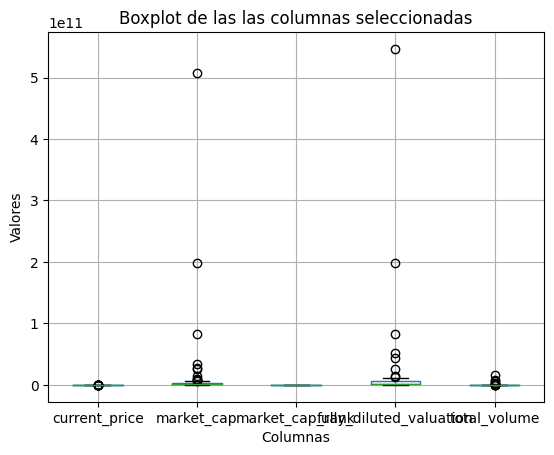

In [16]:
# Se averigua datos outliers para las variables cualitativas, se crea boxplot para las columnas de interés.

columnas = ['current_price', 'market_cap', 'market_cap_rank', 'fully_diluted_valuation', 'total_volume']

df[columnas].boxplot()

plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Boxplot de las las columnas seleccionadas')

plt.show()

Ahora se visualiza los outliers para cada columna, como se ve en la grafica de arriba para market_cap_rank no se presentan datos atipicos.

In [21]:
# Método de rango intercuartílico o IQR (método de Tukey's fences)
# Calcular los límites para los outliers
Q1 = df['current_price'].quantile(0.25)
Q3 = df['current_price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['current_price'] < limite_inferior) | (df['current_price'] > limite_superior)]
cantidad = len(outliers)
print('cantidad de registros', cantidad)
print(outliers)

cantidad de registros 21
    Unnamed: 0               id  symbol               name  \
0            0          bitcoin     btc            Bitcoin   
1            1         ethereum     eth           Ethereum   
3            3      binancecoin     bnb                BNB   
6            6     staked-ether   steth  Lido Staked Ether   
9            9           solana     sol             Solana   
14          14         litecoin     ltc           Litecoin   
16          16  wrapped-bitcoin    wbtc    Wrapped Bitcoin   
18          18     bitcoin-cash     bch       Bitcoin Cash   
26          26              okb     okb                OKB   
27          27           monero     xmr             Monero   
32          32    quant-network     qnt              Quant   
42          42  rocket-pool-eth    reth    Rocket Pool ETH   
43          43            maker     mkr              Maker   
44          44             aave    aave               Aave   
57          57     elrond-erd-2    egld      

In [23]:
#  'market_cap'
# Calcular los límites para los outliers
Q1 = df['market_cap'].quantile(0.25)
Q3 = df['market_cap'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['market_cap'] < limite_inferior) | (df['market_cap'] > limite_superior)]
cantidad = len(outliers)
print('cantidad de registros para market_cap', cantidad)
print(outliers)

cantidad de registros para market_cap 11
    Unnamed: 0            id symbol               name  \
0            0       bitcoin    btc            Bitcoin   
1            1      ethereum    eth           Ethereum   
2            2        tether   usdt             Tether   
3            3   binancecoin    bnb                BNB   
4            4        ripple    xrp                XRP   
5            5      usd-coin   usdc           USD Coin   
6            6  staked-ether  steth  Lido Staked Ether   
7            7       cardano    ada            Cardano   
8            8      dogecoin   doge           Dogecoin   
9            9        solana    sol             Solana   
10          10          tron    trx               TRON   

                                                image  current_price  \
0   https://assets.coingecko.com/coins/images/1/la...   26034.000000   
1   https://assets.coingecko.com/coins/images/279/...    1653.190000   
2   https://assets.coingecko.com/coins/images/

In [24]:
# Calcular los límites para los outliers
Q1 = df['fully_diluted_valuation'].quantile(0.25)
Q3 = df['fully_diluted_valuation'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['fully_diluted_valuation'] < limite_inferior) | (df['fully_diluted_valuation'] > limite_superior)]
cantidad = len(outliers)
print('cantidad de registros para fully_diluted_valuation', cantidad)
print(outliers)

cantidad de registros para fully_diluted_valuation 8
    Unnamed: 0            id symbol               name  \
0            0       bitcoin    btc            Bitcoin   
1            1      ethereum    eth           Ethereum   
2            2        tether   usdt             Tether   
3            3   binancecoin    bnb                BNB   
4            4        ripple    xrp                XRP   
5            5      usd-coin   usdc           USD Coin   
6            6  staked-ether  steth  Lido Staked Ether   
26          26           okb    okb                OKB   

                                                image  current_price  \
0   https://assets.coingecko.com/coins/images/1/la...   26034.000000   
1   https://assets.coingecko.com/coins/images/279/...    1653.190000   
2   https://assets.coingecko.com/coins/images/325/...       0.999580   
3   https://assets.coingecko.com/coins/images/825/...     217.980000   
4   https://assets.coingecko.com/coins/images/44/l...       0.52

In [25]:
# total_volume
# Calcular los límites para los outliers
Q1 = df['total_volume'].quantile(0.25)
Q3 = df['total_volume'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['total_volume'] < limite_inferior) | (df['total_volume'] > limite_superior)]
cantidad = len(outliers)
print('cantidad de registros para total_volume', cantidad)
print(outliers)

cantidad de registros para total_volume 13
    Unnamed: 0             id symbol         name  \
0            0        bitcoin    btc      Bitcoin   
1            1       ethereum    eth     Ethereum   
2            2         tether   usdt       Tether   
3            3    binancecoin    bnb          BNB   
4            4         ripple    xrp          XRP   
5            5       usd-coin   usdc     USD Coin   
9            9         solana    sol       Solana   
12          12  matic-network  matic      Polygon   
14          14       litecoin    ltc     Litecoin   
24          24    binance-usd   busd  Binance USD   
25          25       true-usd   tusd      TrueUSD   
74          74           gala   gala         GALA   
98          98           pepe   pepe         Pepe   

                                                image  current_price  \
0   https://assets.coingecko.com/coins/images/1/la...   2.603400e+04   
1   https://assets.coingecko.com/coins/images/279/...   1.653190e+03  

Haber hallado estos datos atìpicos con el metodo de de Tukey's fences, no significan error en estos registros, simplemente que estos valores estan más alejados del conunto de datos.

## 3. Distribución y relación de los datos

Se entiende que en este top 10 de criptos se hallan las monedas mejor establecidas y de mayor influencia en el mercado en comparación el resto de las criptomonedas. Por ejemplo, si una criptomoneda tiene un "market_cap_rank" de 1, significa que es la criptomoneda con la mayor capitalización de mercado en ese momento. Si tiene un "market_cap_rank" de 10, significa que ocupa la décima posición en términos de capitalización de mercado entre todas las criptomonedas. Para este caso el Bitcoin lidera el primer lugar mientras que solana está en la posicion 10. 

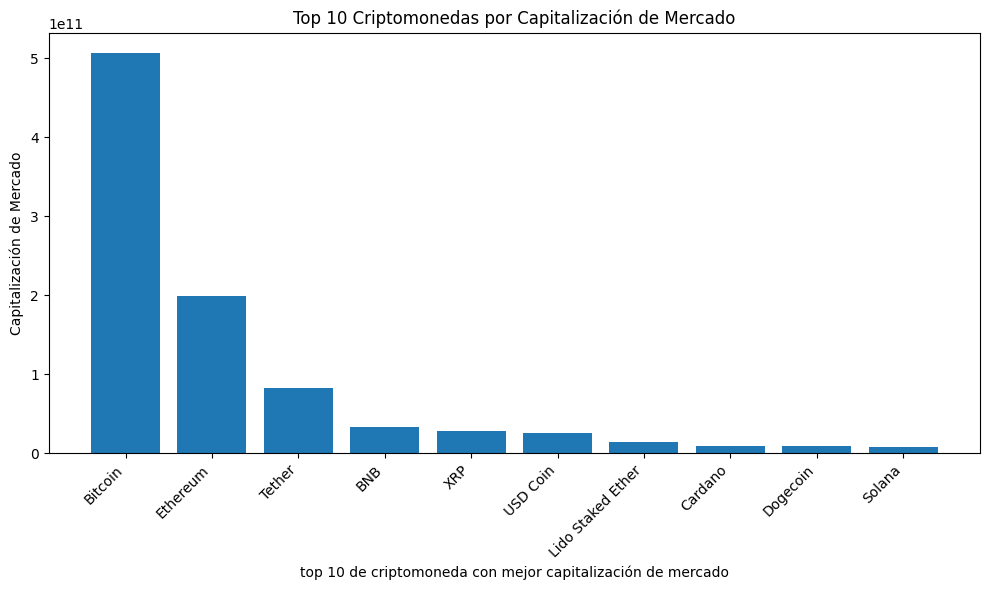

In [17]:
# Se crea un grafico de barras pero usando la columna  market_cap
plt.figure(figsize=(10, 6))
plt.bar(top_10['name'], top_10['market_cap'])
plt.xlabel('top 10 de criptomoneda con mejor capitalización de mercado')
plt.ylabel('Capitalización de Mercado')
plt.title('Top 10 Criptomonedas por Capitalización de Mercado')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

Ahora se ve la dependencia y correlación entre variables

In [20]:
variables = df[['market_cap', 'fully_diluted_valuation']]

# Matriz de correlación
correlation_matrix = variables.corr()

print(correlation_matrix)

                         market_cap  fully_diluted_valuation
market_cap                 1.000000                 0.998392
fully_diluted_valuation    0.998392                 1.000000


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

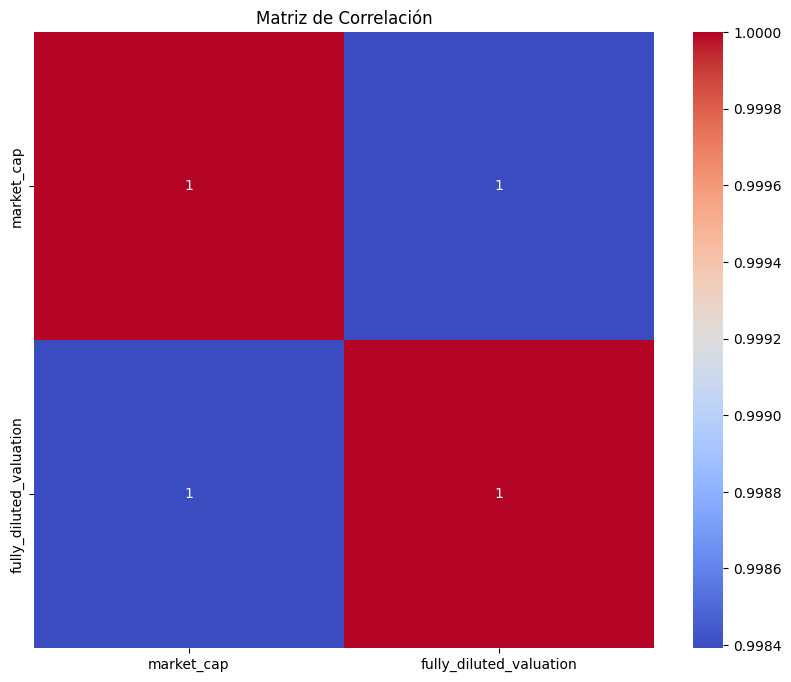

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Las correlaciones entre "market_cap" y "fully_diluted_valuation" son muy cercanas a 1 (0.998408),es una relacion positiva fuerte y se puede decir que las dos variables están altamente relacionadas y tienden a moverse en la misma dirección de manera lineal. En otras palabras, cuando el valor de una variable aumenta, el valor de la otra variable también aumenta en proporción constante, y viceversa.

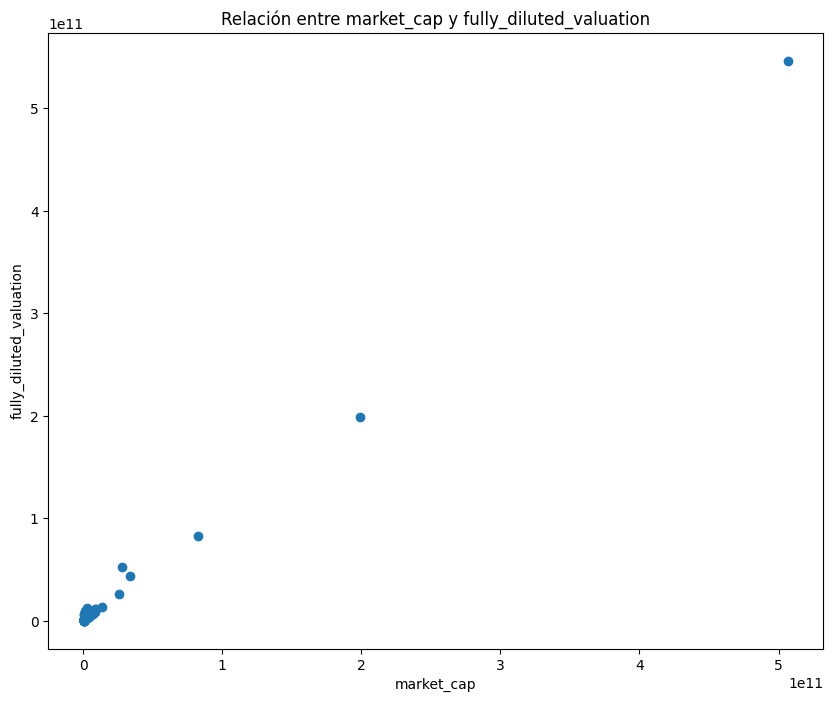

In [22]:
# Scatter plot entre 'budget' y 'revenue'
plt.figure(figsize=(10, 8))
plt.scatter(df['market_cap'], df['fully_diluted_valuation'])
plt.xlabel('market_cap')
plt.ylabel('fully_diluted_valuation')
plt.title('Relación entre market_cap y fully_diluted_valuation')
plt.show()

In [30]:

# riptomoneda "Bitcoin"
bitcoin_data = df[df['name'] == 'Bitcoin']

bitcoin_data


,Unnamed: 0,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage
0,0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26034.0,506846513289,1,5.467374e+11,5.550822e+09,...,-62.2926,2021-11-10T14:24:11.849Z,67.81,38294.59123,2013-07-06T00:00:00.000Z,NaN,2023-08-25T23:23:50.664Z,NaN,NaN,NaN
